In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import joblib
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from  wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
parent_directory = os.path.dirname(os.getcwd())
os.chdir(parent_directory)
os.getcwd()

'd:\\When-Hybrid-meets-the-Prompt'

In [3]:
df_ratings = pd.read_csv("Data/ratings.csv").dropna()
df_ratings = df_ratings.reset_index(drop=True)
df_ratings.info()
df_ratings.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728191 entries, 0 to 728190
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item_id    728191 non-null  int64  
 1   user_id    728191 non-null  float64
 2   user_name  728191 non-null  object 
 3   rating     728191 non-null  float64
 4   review     728191 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 27.8+ MB


,item_id,user_id,user_name,rating,review
728186,3662908,118520988.0,Kim Dion,5.0,Nice and short
728187,3662908,82774866.0,Sidharth sejwal,5.0,Yeah it’s a good course for Adavance beginners...
728188,3662908,78363934.0,Usman Ali Khan,5.0,i like the way it was done even it was not eve...
728189,3662908,73201302.0,Joydeep Paul,5.0,Getting better understanding and motivation. ...
728190,4795980,123450478.0,Bilal Baig,5.0,it was for the begining he taught very well


In [4]:
# def clean_text(text):
#     # text = re.sub(r"[Ââ€™œ¢\t]","", text)
#     text = re.sub(r'[^\x00-\x7F]+'," ", text)
#     text = re.sub(r'[*+]+',"", text)
#     text = ' '.join(text.split())
#     text = text.lower()
#     return text

# df_courses["item_description"] = df_courses["item_description"].apply(clean_text)
# df_courses.head()

In [5]:
# Create a function to get the subjectivity 
def getSubjectivity(text): 
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text): 
  return TextBlob(text).sentiment.polarity

subjectivity = df_ratings['review'].apply(getSubjectivity) 
joblib.dump("reviews_subjectivity", "Assets/reviews_subjectivity.pkl")
polarity = df_ratings['review'].apply(getPolarity)
joblib.dump("reviews_polarity", "Assets/reviews_polarity.pkl")


['Assets/reviews_polarity.pkl']

Polarity and subjectivity are two important aspects of sentiment analysis, which is the process of identifying and extracting opinions, emotions, and attitudes expressed in text. Polarity refers to the degree of positivity or negativity expressed in a piece of text. It is often measured on a scale from -1 (very negative) to +1 (very positive), with 0 representing a neutral sentiment. Subjectivity, on the other hand, refers to the degree to which a piece of text expresses a personal opinion or feeling rather than a factual statement. It is often measured on a scale from 0 (completely objective) to 1 (completely subjective).Both polarity and subjectivity are important in sentiment analysis because they help to determine the overall tone and meaning of a piece of text. By analyzing these factors, we can gain insights into how people feel about particular topics, products, or brands, and use that information to make more informed decisions.


In [6]:
# subjectivity = list(joblib.load("Assets/reviews_subjectivity.pkl"))
# polarity = list(joblib.load("Assets/reviews_polarity.pkl"))


In [23]:
type(subjectivity)
type(polarity)

pandas.core.series.Series

In [7]:

print(len(subjectivity),subjectivity[:10])
print(len(polarity),polarity[:10])

728191 0    0.0000
1    0.5875
2    0.7500
3    0.6000
4    0.9000
5    0.7000
6    0.0000
7    0.0000
8    0.6000
9    1.0000
Name: review, dtype: float64
728191 0    0.000000
1    0.316667
2    0.388889
3    0.700000
4    0.590000
5    0.400000
6    0.000000
7    0.000000
8    0.700000
9    0.600000
Name: review, dtype: float64


run time: 2 minutes 44 seconds

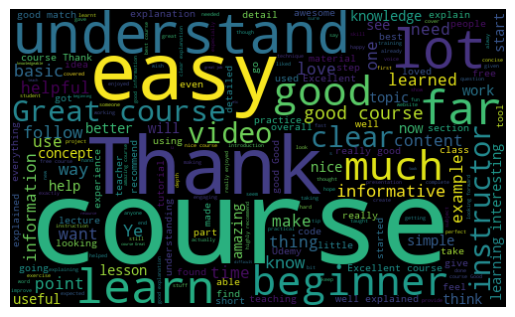

In [8]:
allwords = ' '.join([review for review in df_ratings['review']] )
word_Cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(word_Cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [9]:
def getAnalysis (score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_ratings["analysis"] = pd.DataFrame(polarity.apply(getAnalysis))

#Show the dataframe
df_ratings.head()

,item_id,user_id,user_name,rating,review,analysis
0,473160,152405496.0,sagar Lakshkar,4.5,amzing tutorials and knowledge,Neutral
1,473160,152373866.0,Jyotish Kumar,3.5,pretty much good course for beginner. He teach...,Positive
2,473160,152367574.0,Sarah E Brown,4.5,It is insightful and detailed while keeping a ...,Positive
3,473160,152336042.0,Rahul Mirajkar,5.0,It was really a good session,Positive
4,473160,152303730.0,Atiofack Tresor Steve,5.0,It is very nice and contains everything to kno...,Positive


In [39]:
df_sentimental_analysis = pd.DataFrame(zip(df_ratings["user_id"], df_ratings["analysis"],polarity,subjectivity), columns=["user_id","analysis" ,"polarity","subjectivity"])
df_sentimental_analysis.head()

,user_id,analysis,polarity,subjectivity
0,152405496.0,Neutral,0.000000,0.0000
1,152373866.0,Positive,0.316667,0.5875
2,152367574.0,Positive,0.388889,0.7500
3,152336042.0,Positive,0.700000,0.6000
4,152303730.0,Positive,0.590000,0.9000


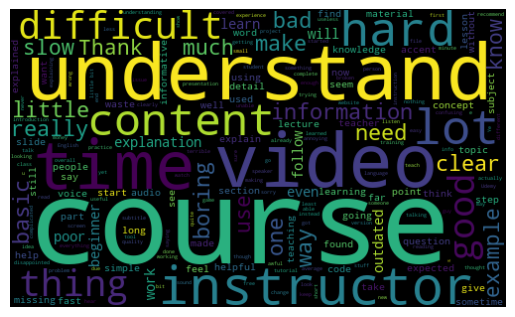

In [46]:
# Print all of the Negative tweets
neg_reviews = df_ratings[df_ratings["analysis"] == "Negative"]

allwords = ' '.join([review for review in neg_reviews["review"]] )
word_Cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(word_Cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

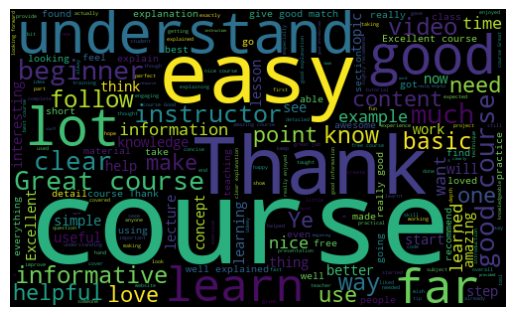

In [47]:
# Print all of the Negative tweets
pos_reviews = df_ratings[df_ratings["analysis"] == "Positive"]

allwords = ' '.join([review for review in pos_reviews["review"]] )
word_Cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(word_Cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

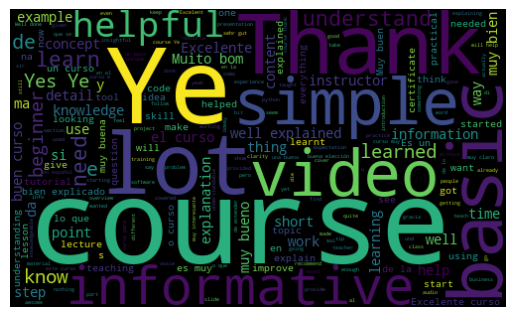

In [48]:
# Print all of the Negative tweets
neu_reviews = df_ratings[df_ratings["analysis"] == "Neutral"]

allwords = ' '.join([review for review in neu_reviews["review"]] )
word_Cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(word_Cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [11]:
subjectivity_scaler = StandardScaler()
df_sentimental_analysis[["subjectivity","polarity"]]= subjectivity_scaler.fit_transform(df_sentimental_analysis[["subjectivity", "polarity"]])

(array([  1252.,    831.,   1946.,   8602., 126419., 104035., 150135.,
        147577., 128435.,  58959.]),
 array([-4.35835539, -3.72569474, -3.09303409, -2.46037344, -1.82771278,
        -1.19505213, -0.56239148,  0.07026917,  0.70292982,  1.33559048,
         1.96825113]),
 <BarContainer object of 10 artists>)

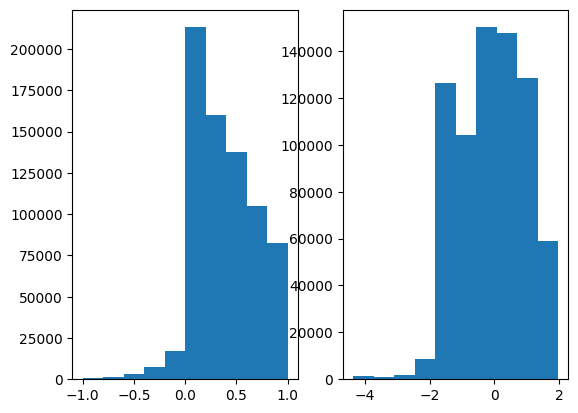

In [12]:
plt.subplot(1,2,1)
plt.hist(polarity)
plt.subplot(1,2,2)
plt.hist(df_sentimental_analysis["polarity"])

(array([101080.,  11147.,  26290.,  70247., 103325.,  78312., 148032.,
         80407.,  37255.,  72096.]),
 array([-1.81684985, -1.46568935, -1.11452885, -0.76336835, -0.41220785,
        -0.06104735,  0.29011315,  0.64127365,  0.99243415,  1.34359464,
         1.69475514]),
 <BarContainer object of 10 artists>)

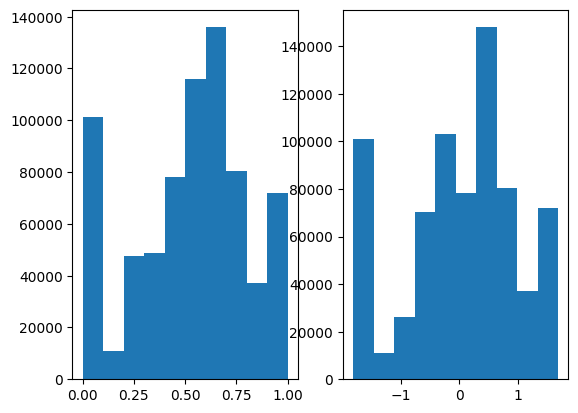

In [17]:
plt.subplot(1,2,1)
plt.hist(subjectivity)
plt.subplot(1,2,2)
plt.hist(df_sentimental_analysis["subjectivity"])

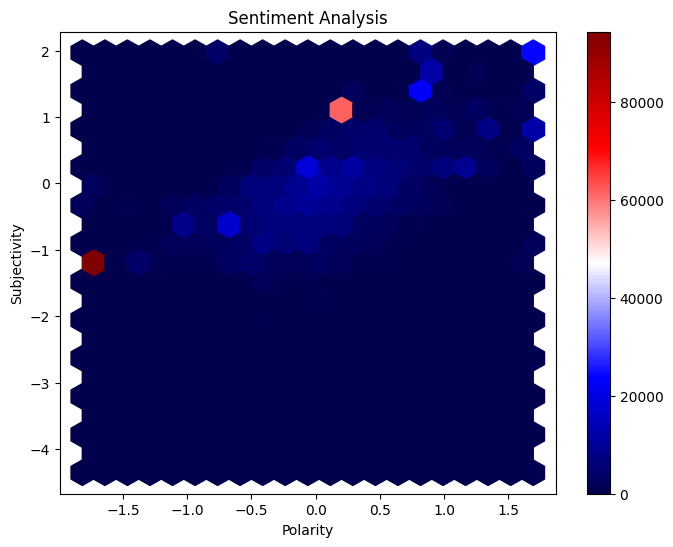

In [36]:
plt.figure(figsize=(8,6))

plt.hexbin(df_sentimental_analysis["subjectivity"],
           df_sentimental_analysis["polarity"],
           gridsize=20,
           cmap="seismic")


plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.colorbar()
plt.show()

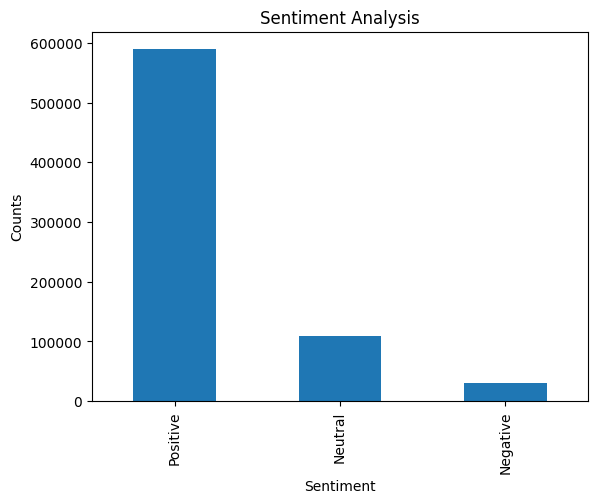

In [21]:
df_ratings['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_ratings['analysis'].value_counts().plot(kind='bar')
plt.show()